"Se usa el dataset chineseMNIST 2 , este se presento al ingeniero"

In [1]:
%pip install grip
%pip install supyr-struct

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached Markdown-3.6-py3-none-any.whl.metadata (7.0 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/138.5 kB ? eta -:

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


   ---------------------------------------- 0.0/236.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/236.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/236.5 kB ? eta -:--:--
   - -------------------------------------- 10.2/236.5 kB ? eta -:--:--
   - -------------------------------------- 10.2/236.5 kB ? eta -:--:--
   - -------------------------------------- 10.2/236.5 kB ? eta -:--:--
   ----- --------------------------------- 30.7/236.5 kB 145.2 kB/s eta 0:00:02
   ---------- ---------------------------- 61.4/236.5 kB 233.8 kB/s eta 0:00:01
   --------------- ----------------------- 92.2/236.5 kB 308.0 kB/s eta 0:00:01
   ----------------------- -------------- 143.4/236.5 kB 425.3 kB/s eta 0:00:01
   --------------------------- ---------- 174.1/236.5 kB 455.1 kB/s eta 0:00:01
   -------------------------------------  235.5/236.5 kB 554.9 kB/s eta 0:00:01
   -------------------------------------- 236.5/236.5 kB 536.1 kB/s eta 0:00:00
Note: you m

### Descripción del Dataset

El dataset utilizado es un conjunto de imágenes en formato IDX comprimido en un archivo .gz, que contiene 60,000 imágenes en escala de grises de 28x28 píxeles. Este formato es comúnmente utilizado para datasets de imágenes en Machine Learning, como el MNIST. Las imágenes no están etiquetadas, por lo que se utilizarán técnicas de clustering para analizarlas.

¿Qué es el formato IDX y cuál es la diferencia respecto a .csv?

- Formato IDX: El formato IDX es un formato binario que se utiliza para almacenar grandes cantidades de datos de manera eficiente. Es comúnmente usado en datasets de imágenes como MNIST. Los datos se almacenan en una estructura compacta y se pueden leer rápidamente. Los archivos IDX suelen estar comprimidos en .gz para reducir el tamaño del archivo.

- Formato CSV: El formato CSV (Comma-Separated Values) es un formato de texto plano que almacena datos tabulares en forma de texto. Cada línea del archivo representa una fila de la tabla y las columnas están separadas por comas. Los archivos CSV son fáciles de leer y editar con herramientas simples, pero no son tan eficientes en términos de almacenamiento y velocidad de lectura/escritura como los archivos binarios como IDX.

#### Paso 1: Importar Librerías Necesarias y Definir Función para Leer el Archivo IDX

 En este paso se lee un archivo IDX comprimido y lo carga en un array de NumPy. La función read_idx descomprime el archivo, lee el encabezado para obtener las dimensiones del array y luego carga los datos en una estructura de array de NumPy.

In [15]:
import gzip
import struct
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Ruta del archivo
file_path = 'train-images-idx3-ubyte.gz'

## Función para leer el archivo IDX
def read_idx(filename):
    with gzip.open(filename, 'rb') as f:
        # Leer el encabezado del archivo
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        # Leer los datos del archivo
        data = np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)
        return data
    
## Cargar los datos
images = read_idx(file_path)

images

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [ 83, 147, 126, ..., 145,  49,   0

Imprimimos la forma del array de imágenes, confirmando que hay 60,000 imágenes, cada una de 28x28 píxeles.

In [31]:
# Mostrar la forma de las imágenes

print(f"Shape de las imágenes: {images.shape}")

Shape de las imágenes: (60000, 28, 28)


#### Paso 3: Aplanar las Imágenes y Crear un DataFrame
 Las imágenes 2D se aplanan a una dimensión (28x28 = 784 columnas) para que cada imagen sea una fila en el DataFrame. Cada columna representa un píxel, y sus valores van de 0 a 255, representando la intensidad en escala de grises.

In [17]:
# Aplanar las imágenes para que cada imagen sea una fila
n_samples, width, height = images.shape
images_flat = images.reshape(n_samples, width * height)

# Crear un DataFrame de pandas
columns = [f'pixel{i}' for i in range(width * height)]
df_images = pd.DataFrame(images_flat, columns=columns)

# Visualizar las primeras filas del DataFrame
print(df_images.head())


   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0      32   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...       122       255        90         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3     164  ...       255        64         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0   

#### Paso 4: Mostrar la Forma del DataFrame

Confirmamos que el DataFrame tiene 60,000 filas (imágenes) y 784 columnas (píxeles).

In [19]:
images_flat
print(f"Shape de las imágenes: {df_images.shape}")

Shape de las imágenes: (60000, 784)


### Paso 5: Normalizar los Datos
Los datos se normalizan para que los valores de los píxeles estén en el rango [0, 1] en lugar de [0, 255]. 

In [23]:
images_normalized = images_flat.astype(np.float32) / 255
images_normalized

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Paso 6: Convertir los Datos a Imágenes y Mostrar Algunas Imágenes Aleatorias


Se vuelve a convertir las imágenes a su forma original (28x28) para poder visualizarlas con matplotlib. Se seleccionan 9 imágenes aleatorias para su visualización.

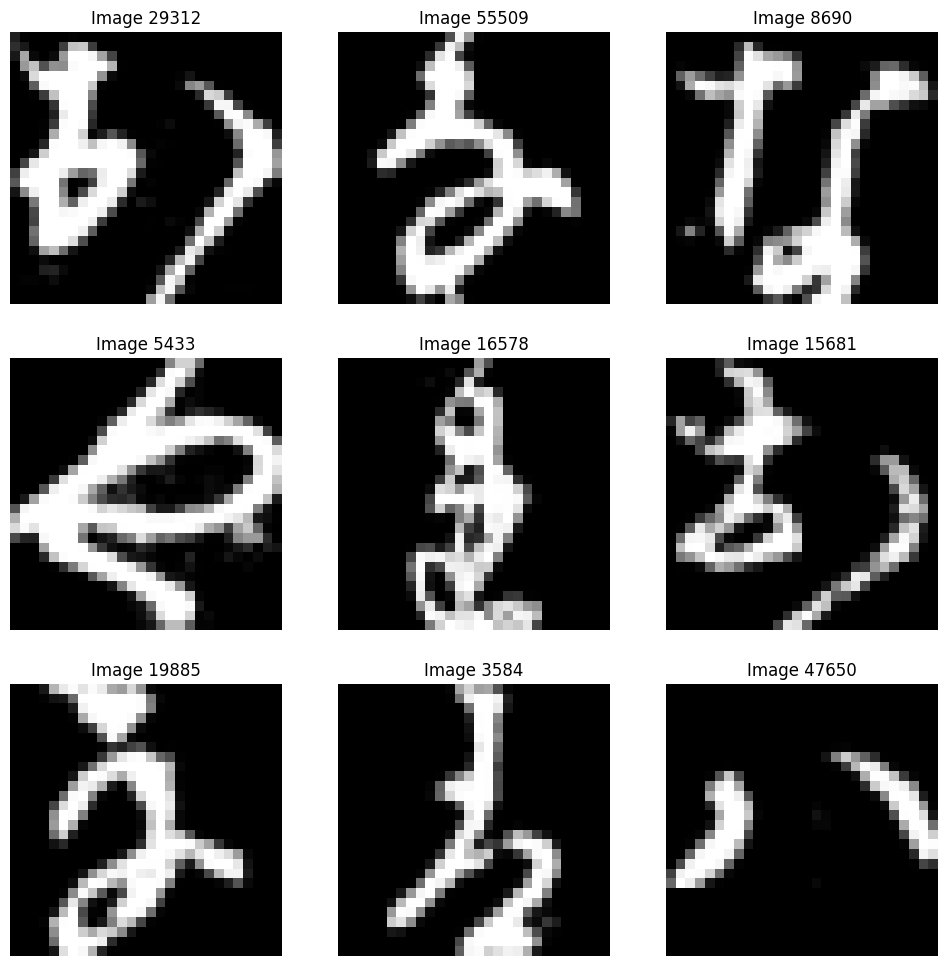

In [26]:
# Convertir los datos planos en imágenes 64x64
images_reshaped = images_normalized.reshape(-1, 28, 28)

# Índices aleatorios
random_indices = np.random.choice(len(images_reshaped), size=9, replace=False)

# Mostrar algunas imágenes aleatorias
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
plt.gray()

for i, ax in enumerate(axs.flat):
    ax.imshow(images_reshaped[random_indices[i]], cmap='gray')
    ax.axis('off')
    ax.set_title(f'Image {random_indices[i]}')

plt.show()

 #### Paso 7: Volver a Aplanar las Imágenes para Clustering

Volvemos a aplanar las imágenes para prepararlas para el clustering.

In [28]:
n_samples, width, height = images.shape
images_flat = images_reshaped.reshape(n_samples, width * height)

#### Paso 8: Calcular el Score de Silueta para Diferentes Números de Clusters

Utilizamos K-Means para realizar clustering en diferentes números de clusters (2 a 15) y calculamos el score de silueta para cada uno. El score de silueta mide la calidad del clustering. Un score más alto indica que las muestras están bien agrupadas dentro de sus clusters. Se grafica el score de silueta y se determina el número óptimo de clusters.

**Diagrama de Silueta**

**Explicación del Diagrama de Silueta:**

El diagrama de silueta es una herramienta de visualización que mide la calidad de un clustering. Cada punto en el diagrama representa una muestra y muestra qué tan cerca está del cluster vecino, comparado con su propio cluster.

- Silhouette Coefficient: El coeficiente de silueta varía entre -1 y 1. Un valor cercano a 1 indica que la muestra está bien agrupada dentro de su cluster y es distinta a los otros clusters. Un valor cercano a 0 indica que la muestra está en el límite entre dos clusters. Un valor negativo indica que la muestra podría estar mal asignada a su cluster.

- Interpretación: Un promedio de silueta más alto sugiere un mejor clustering. Sin embargo, también se debe considerar la estabilidad y consistencia de los clusters al seleccionar el número óptimo de clusters.

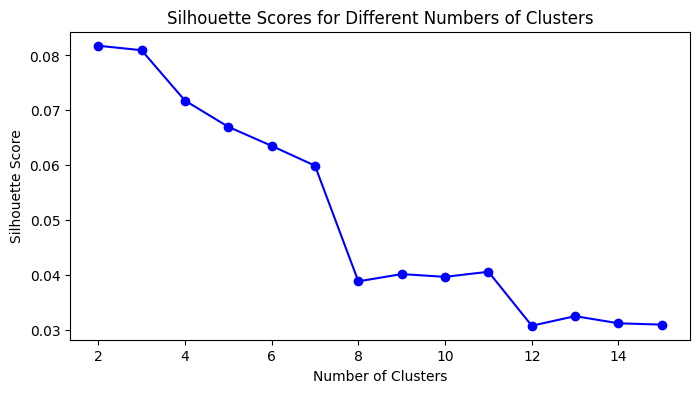

El número óptimo de clusters es: 2


In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Preparar el rango de números de clusters a evaluar
range_values = range(2, 16)
silhouette_scores = []

# Calcular el score de silueta para cada número de clusters
for k in range_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(images_normalized)
    score = silhouette_score(images_normalized, kmeans.labels_)
    silhouette_scores.append(score)

# Gráfico de los scores de silueta
plt.figure(figsize=(8, 4))
plt.plot(range_values, silhouette_scores, "bo-")
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Imprimir el número óptimo de clusters
optimal_clusters = range_values[silhouette_scores.index(max(silhouette_scores))]
print(f'El número óptimo de clusters es: {optimal_clusters}')


#### Paso 9: Visualización de los Diagramas de Silueta
Después de encontrar el número óptimo de clusters, podemos visualizar los diagramas de silueta para confirmar la calidad del clustering.

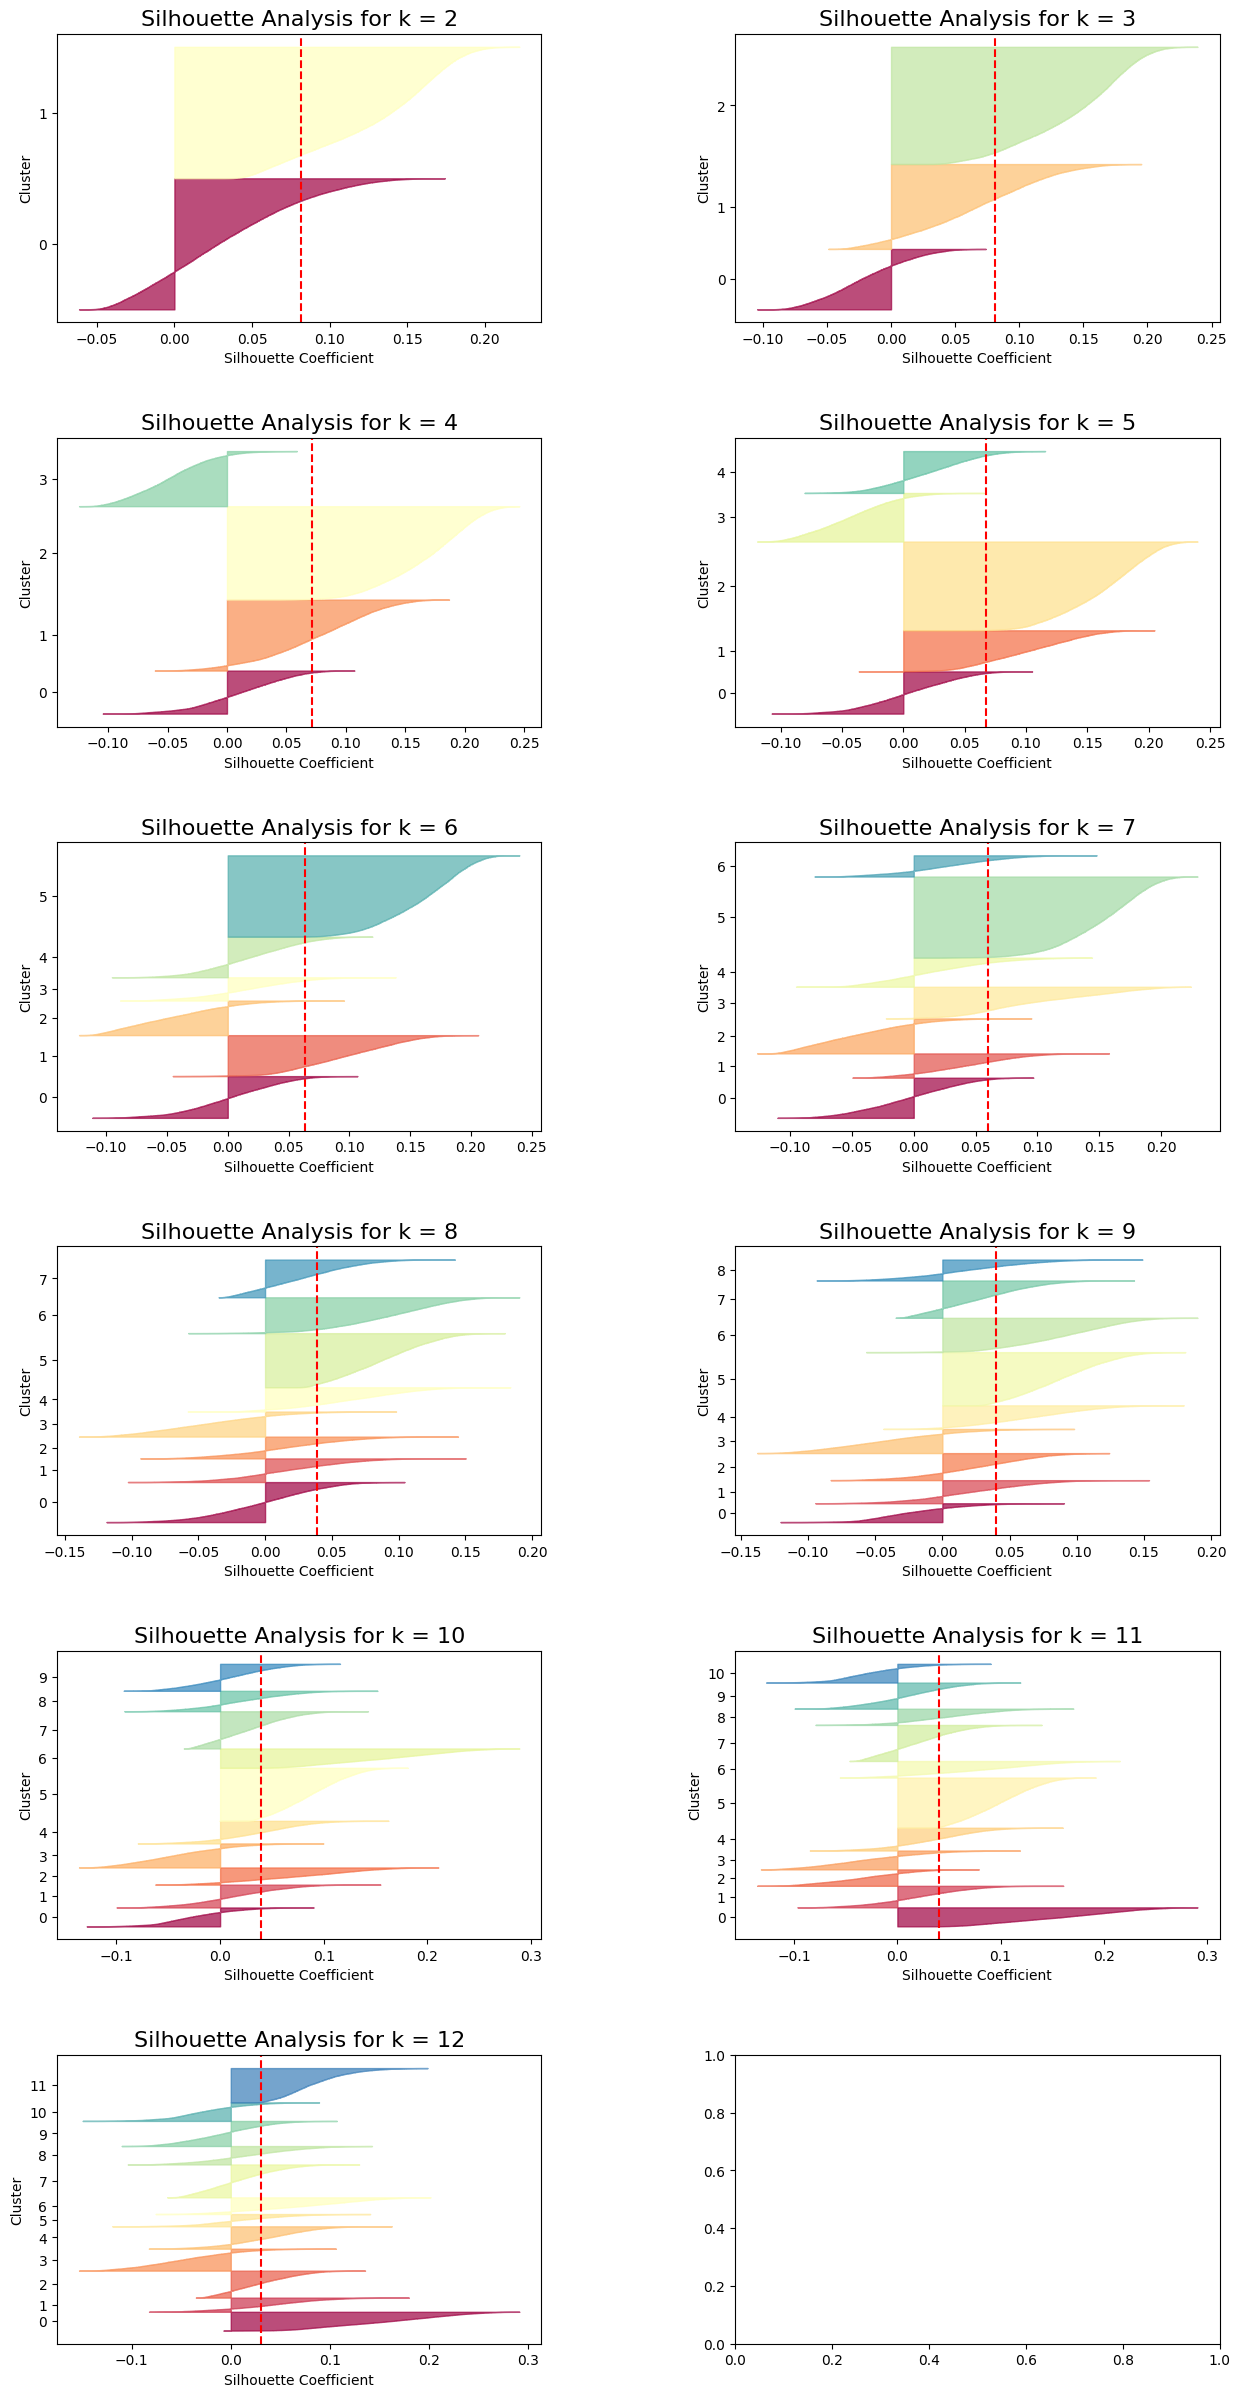

In [34]:
## Paso 7: Visualizar los Diagramas de Silueta
from sklearn.metrics import silhouette_samples, silhouette_score

def plot_silhouette_diagrams(data, range_k):
    fig, axs = plt.subplots(6, 2, figsize=(15, 30))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    for i, k in enumerate(range_k):
        ax = axs[i // 2, i % 2]
        kmeans = KMeans(n_clusters=k, random_state=42)
        y_pred = kmeans.fit_predict(data)
        silhouette_coefficients = silhouette_samples(data, y_pred)

        silhouette_avg = silhouette_score(data, y_pred)
        ticks = []
        y_lower = 10

        for j in range(k):
            jth_cluster_silhouette_values = silhouette_coefficients[y_pred == j]
            jth_cluster_silhouette_values.sort()

            size_cluster_j = jth_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_j

            color = plt.cm.Spectral(j / k)
            ax.fill_betweenx(np.arange(y_lower, y_upper), 0, jth_cluster_silhouette_values,
                             facecolor=color, edgecolor=color, alpha=0.7)
            ticks.append((y_lower + y_upper) / 2)
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax.set_yticks(ticks)
        ax.set_yticklabels(range(k))
        ax.set_ylabel('Cluster')
        ax.set_xlabel('Silhouette Coefficient')
        ax.set_title(f'Silhouette Analysis for k = {k}', fontsize=16)

    plt.show()

# Rango de clusters a analizar
range_clusters = range(2, 13)

# Llamar a la función para visualizar los diagramas de silueta
plot_silhouette_diagrams(images_flat, range_clusters)

## 2. Aprendizaje no supervisado. Aplicación del modelo mini-batch K-Means
MiniBatchKMeans es particularmente útil cuando se trabaja con grandes volúmenes de datos que no caben completamente en la memoria. Al utilizar lotes pequeños de datos (mini-batches), reduce significativamente el uso de memoria

### 2.1 Cargar el conjunto de datos chinesMnist
Unimos las imágenes y las etiquetas en un mismo dataset porque facilita el manejo de los datos.
Tener las imágenes (características) y las etiquetas (clases) en el mismo dataframe permite realizar operaciones de preprocesamiento, análisis y entrenamiento de modelos de manera más sencilla.

##### Por Qué Unir las Imágenes y las Etiquetas en un Mismo Dataset:
Facilita el Manejo de Datos:
Tener las imágenes y las etiquetas en un mismo dataset permite un manejo más simple y eficiente de los datos.


In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd


mnist= pd.read_csv('train_data.csv')

In [2]:
print(mnist.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      8       0       0       0       0       0       0       0       0   
1      7       0       0       0       0       0       0       0       0   
2      0       0       0       0       0       0       0       0       0   
3      1       0       0       0       0       0       0       0       0   
4      4       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...       122       255        90         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3      32  ...       255        64         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [3]:
mnist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 359.3 MB


### 2.2 División del conjunto de datos X y las etiquetas mnist["label"] en conjuntos de entrenamiento y prueba.

In [4]:
from sklearn.model_selection import train_test_split

# la columna 'label' es la etiqueta
X = mnist.iloc[:, 1:] # Todas las columnas excepto la primera
y = mnist['label']  # Suponiendo que 'label' es la etiqueta

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Normalización de los conjuntos de entrenamiento y prueba
##### Este proceso convierte los valores de píxeles de las imágenes de enteros (0-255) a números de punto flotante (float32), y luego los escala a un rango entre 0 y 1. Esto es importante para muchos algoritmos de aprendizaje automático, ya que ayuda a mejorar el rendimiento y la velocidad de convergencia durante el entrenamiento.

In [5]:
#normalizamos
X_train_scaled = X_train.astype(np.float32) / 255
X_test_scaled = X_test.astype(np.float32) / 255

### 2.3 Función load_next_batch(batch_size)
 Esto se hace para implementar el aprendizaje por lotes, se utilizará muestras de datos en lugar de todo el conjunto de datos a la vez.
 
 Propósito de la Función: Clarifica que la función se utiliza para cargar un lote de datos aleatorios que son útiles para el entrenamiento en mini-batch, una técnica común en el aprendizaje automático para mejorar la eficiencia y la convergencia del entrenamiento.

 Generación de Índices Aleatorios: Explica cómo se generan índices aleatorios para seleccionar muestras del conjunto de entrenamiento X_train_scaled, usando np.random.choice, que permite seleccionar índices sin repetir (replace=False).

Selección de Datos: Describe el uso de .iloc para obtener las filas específicas de X_train_scaled basadas en los índices aleatorios generados, lo que resulta en un lote de datos listo para ser utilizado en operaciones de entrenamiento.

In [6]:

def load_next_batch(batch_size):
    # Genera un array de índices aleatorios con base en la cantidad de filas en X
    random_indices = np.random.choice(len(X_train_scaled), batch_size, replace=False)
    # Usa .iloc para seleccionar las filas correspondientes a esos índices
    return X_train_scaled.iloc[random_indices]

### 2.4 Entrenamiento de un modelo de agrupamiento utilizando el algoritmo Mini-Batch K-Means
MiniBatchKMeans puede ser mucho más rápido que el K-Means estándar, especialmente en grandes conjuntos de datos.
MiniBatchKMeans tiende a converger más rápido hacia una solución, aunque esta puede no ser la óptima global como podría ser con el K-Means estándar.

In [7]:
from sklearn.cluster import MiniBatchKMeans

k = 10                                 #Número de clústeres (grupos) en los que se desea dividir los datos.
n_init = 10                           #Número de veces que se ejecutará el algoritmo con diferentes centroides iniciales. Se elige el modelo con la inercia más baja.
n_iterations = 100                    #Número total de iteraciones para entrenar el modelo Mini-Batch K-Means.
batch_size = 100                      #Tamaño del lote (batch) de muestras que se utilizará en cada iteración del entrenamiento.
init_size = 500                       #Tamaño del conjunto de datos de inicialización -> para inicializar los centroides iniciales del algoritmo.
evaluate_on_last_n_iters = 10         #Número de últimas iteraciones en las que se evaluará la inercia para determinar el mejor modelo.

best_kmeans = None                    #Variable best_kmeans: Va almacenar el mejor modelo Mini-Batch K-Means encontrado durante el bucle de inicialización

for init in range(n_init):            #Bucle de inicialización: Itera n_init veces para entrenar el modelo con diferentes centroides iniciales.
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size, n_init=1)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

## 2.5 Modelo Mini-Batch K-Means encontrado para el entrenamiento
Se calcula la puntuación del mejor modelo Mini-Batch K-Means en relación con el conjunto de datos X. Ésto proporciona una medida de qué tan bien se ajustan los datos a los clústeres definidos por el modelo.\
La puntuación se calcula como la negativa de la inercia del modelo, que es una medida de la suma de las distancias cuadradas de las muestras a su centroide más cercano.\
Se prefiere una puntuación más alta que va indicar que el modelo tiene una inercia menor y que se ha agrupado mejor los datos.

In [8]:
# Evaluar el modelo
score = best_kmeans.score(X_train_scaled)
print(f"Score: {score}")

Score: -3053721.0


Un valor de score como -3053721 indica que la inercia del modelo es bastante alta. Esto podría sugerir que los clústeres formados por el modelo no están tan bien definidos, y que muchos puntos están relativamente lejos de sus centroides.

### 2.6 Encontrar el número óptimo de grupos aplicando la métrica silhouette score.
La métrica silhouette score se basa en el cálculo del coeficiente de silueta (silhouette coefficient) de todas las muestras del dataset como $(b-a)/\mathrm{max}(a,b)$ donde $a$ es la distancia mínima al resto de muestras del mismo grupo y $b$ es la distancia media de los grupos más cercanos.\
El coeficiente de silueta varía entre -1 y 1. Un coeficiente de silueta cercano a 1 indica que la muestra está bien clasificada en su propio clúster y lejos de los clústeres vecinos. Un coeficiente de silueta cercano a -1 indica que la muestra puede estar mal clasificada en su propio clúster y cerca de los clústeres vecinos. Un coeficiente de silueta cercano a 0 indica que la muestra está cerca del límite de decisión entre dos clústeres.

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_train_scaled)

KMeans(n_clusters=10, random_state=42)

In [10]:
from sklearn.metrics import silhouette_score
silhouette_score(X_train_scaled, kmeans.labels_)

0.030310368

#### Observación:
Un valor de silueta de aproximadamente 0.03 está más cerca de 0 que de 1, lo que indica que los clústeres formados no son muy densos ni bien separados. Esto sugiere que hay un solapamiento considerable entre los clústeres, y que los puntos dentro de un clúster no están mucho más cerca entre sí en comparación con los puntos en clústeres vecinos.

## Calcular la métrica para diferentes números de clusters 'k'
Se va a determinar la calidad de los clusters generados por KMeans para diferentes valores de 'k' (1 a 10)  utilizando el coeficiente de silueta como métrica de evaluacion.\
Objetivo: Encontrar el valor óptimo de 'k'.

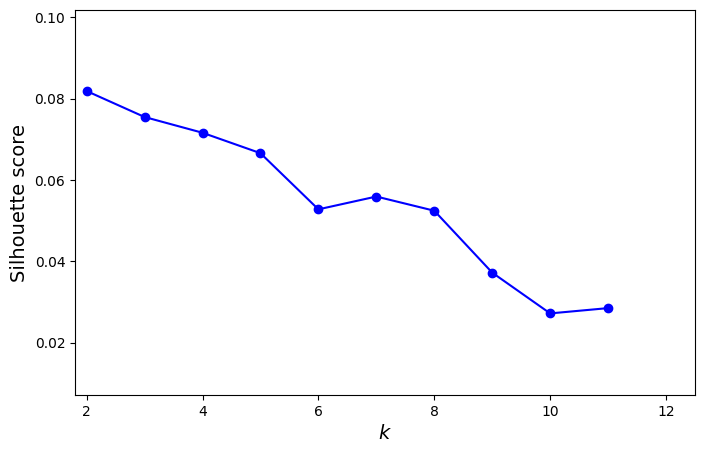

In [12]:
import matplotlib.pyplot as plt
kmeans_per_k = [KMeans(n_clusters=k, n_init = 10, random_state=42).fit(X_train_scaled)
                for k in range(1, 12)]

silhouette_scores = [silhouette_score(X_train_scaled, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 5))
plt.plot(range(2, 12), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
#plt.axis([1.8, 8.5, 0.55, 0.7])
plt.axis([1.8, 12.5, min(silhouette_scores) - 0.02, max(silhouette_scores) + 0.02])  # Ajustamos el tamaño del eje y
plt.show()

#### Observación:
Se puede verificar que para k=5, el coeficiente de silueta es más cercano a 1. Con k=5 las muestras están mejor agrupadas.

### 2.7 Diagramas de silueta para diferentes valores de 'k'
En los diagramas se puede visualizar todos los coeficientes de silueta ordenados por grupos y su valor.

<Figure size 1500x1800 with 0 Axes>

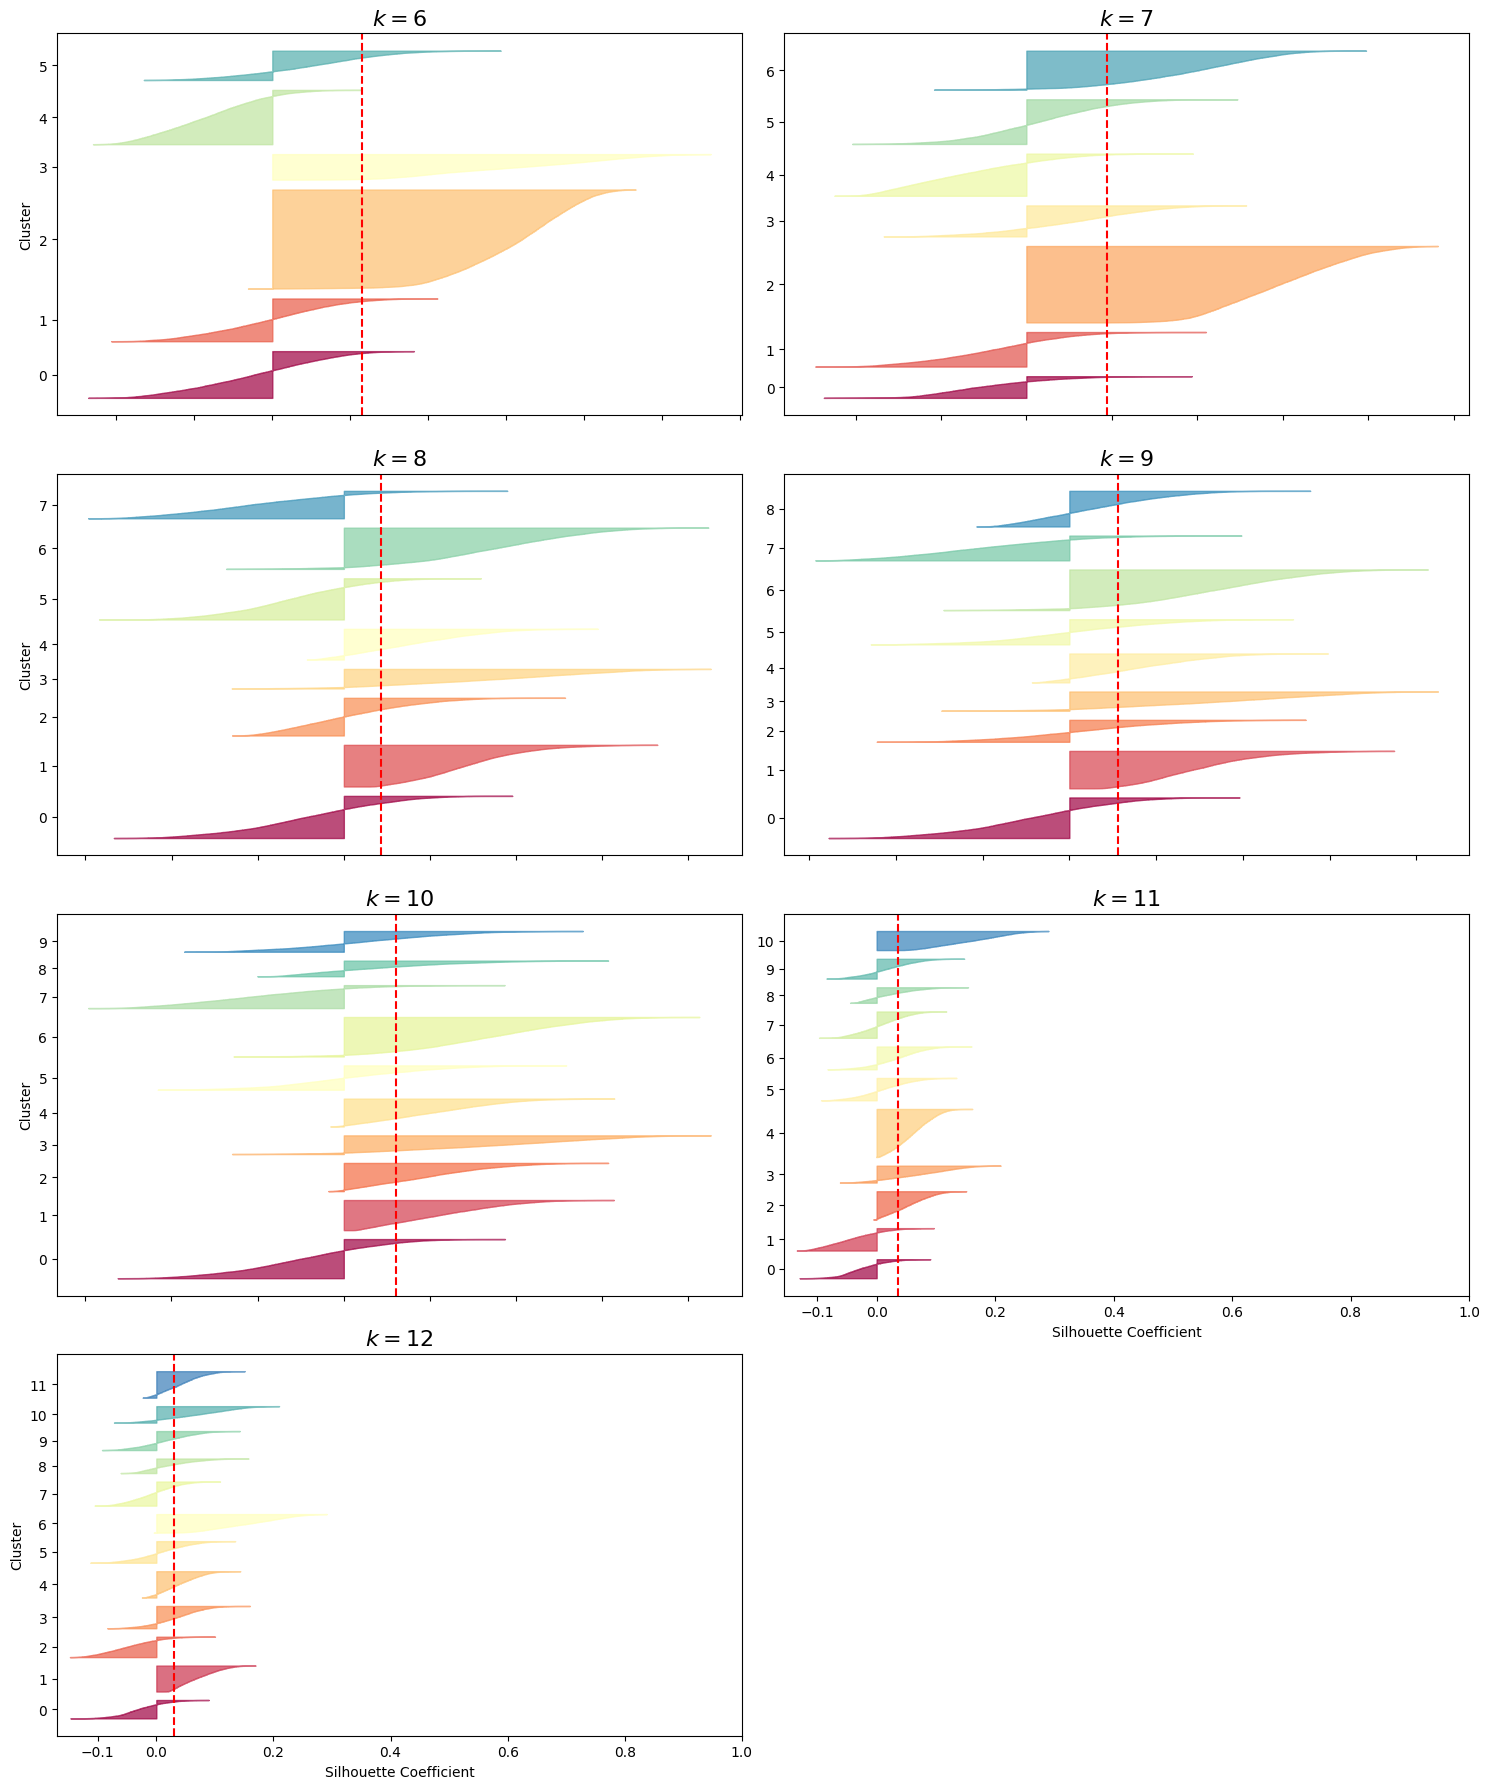

In [51]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(15, 18))

# Aquí reentrenamos los modelos KMeans para k desde 6 hasta 12
kmeans_per_k = []
silhouette_scores = []

for k in range(6, 13):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)  # Usa tus datos escalados
    
    # Verificar que el número de clústeres es válido
    if len(np.unique(kmeans.labels_)) > 1:
        kmeans_per_k.append(kmeans)
        silhouette_score_value = silhouette_score(X_train_scaled, kmeans.labels_)
        silhouette_scores.append(silhouette_score_value)
    else:
        print(f"El modelo con k={k} asignó todas las muestras a un solo clúster.")

# Generar los gráficos solo para los valores de k válidos
plt.figure(figsize=(15, 18))

# Ajustar el rango del bucle para incluir k desde 6 hasta 12
for k in range(6, 13):
    # Solo generar gráficos para k que tienen modelos válidos
    if k - 6 < len(kmeans_per_k):
        plt.subplot(4, 2, k - 5)  # Ajustar el diseño de los subplots

        y_pred = kmeans_per_k[k - 6].labels_  # Ajustar el índice
        silhouette_coefficients = silhouette_samples(X_train_scaled, y_pred)

        padding = len(X_train_scaled) // 30
        pos = padding
        ticks = []
        for i in range(k):
            coeffs = silhouette_coefficients[y_pred == i]
            coeffs.sort()

            color = mpl.cm.Spectral(i / k)
            plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                              facecolor=color, edgecolor=color, alpha=0.7)
            ticks.append(pos + len(coeffs) // 2)
            pos += len(coeffs) + padding

        plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
        plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
        if k in (6, 8, 10, 12):
            plt.ylabel("Cluster")

        if k in (11, 12):
            plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
            plt.xlabel("Silhouette Coefficient")
        else:
            plt.tick_params(labelbottom=False)

        plt.axvline(x=silhouette_scores[k - 6], color="red", linestyle="--")
        plt.title("$k={}$".format(k), fontsize=16)

plt.tight_layout()
plt.show()

## 3. Aprendizaje Semi-Supervisado con K-Means
El aprendizaje semisupervisado es un enfoque de aprendizaje automático que combina técnicas del aprendizaje supervisado y no supervisado. En este tipo de aprendizaje, se utiliza tanto datos etiquetados (conocidos) como no etiquetados durante el entrenamiento del modelo. Esto lo diferencia del aprendizaje supervisado, que utiliza únicamente datos etiquetados, y del aprendizaje no supervisado, que emplea solo datos sin etiquetar.


#### Paso 1: Cargar el Dataset con Etiquetas y Dividirlo en Conjuntos de Entrenamiento y Prueba

Se carga el dataset con etiquetas, se separan las características (X) de las etiquetas (y) y se divide el dataset en conjuntos de entrenamiento y prueba.



In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

# Cargar el dataset
mnist = pd.read_csv('train_data.csv')

# la columna 'label' es la etiqueta
X = mnist.iloc[:, 1:] # Todas las columnas excepto la primera
y = mnist['label']  # Suponiendo que 'label' es la etiqueta

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Paso 2: Escalar los Datos

- StandardScaler: Escala los datos para que tengan una media de 0 y una desviación estándar de 1. Es útil cuando los datos siguen una distribución aproximadamente normal.

- Normalización a [0, 1]: Es común para datos de imágenes, ya que los valores de píxeles están naturalmente en el rango [0, 255].

Para datos de imágenes, generalmente es mejor normalizar los datos al rango [0, 1] utilizando images_flat.astype(np.float32) / 255

In [87]:
X_train_scaled = X_train.astype(np.float32) / 255
X_test_scaled = X_test.astype(np.float32) / 255

print(X_train_scaled)  

         pixel0    pixel1  pixel2    pixel3    pixel4    pixel5  pixel6  \
18794  0.000000  0.000000     0.0  0.000000  0.000000  0.000000     0.0   
54720  0.000000  0.000000     0.0  0.000000  0.000000  0.000000     0.0   
41715  0.000000  0.000000     0.0  0.000000  0.000000  0.000000     0.0   
12840  0.000000  0.000000     0.0  0.000000  0.000000  0.000000     0.0   
13729  0.000000  0.000000     0.0  0.000000  0.000000  0.000000     0.0   
...         ...       ...     ...       ...       ...       ...     ...   
54343  0.000000  0.000000     0.0  0.000000  0.000000  0.000000     0.0   
38158  0.000000  0.000000     0.0  0.000000  0.000000  0.000000     0.0   
860    0.098039  0.509804     0.6  0.592157  0.447059  0.101961     0.0   
15795  0.000000  0.000000     0.0  0.000000  0.000000  0.000000     0.0   
56422  0.000000  0.000000     0.0  0.000000  0.000000  0.000000     0.0   

         pixel7    pixel8    pixel9  ...  pixel774  pixel775  pixel776  \
18794  0.000000  0.000000

#### Paso 3: Entrenamiento del modelo KMeans



In [88]:
from sklearn.cluster import KMeans

# Utilizar el valor óptimo de k basado en el análisis de silueta
k = 12 # Según el análisis este valor puede cambiar en un rango de 10 a 12
kmeans = KMeans(n_clusters=k, random_state=42)        
X_digits_dist = kmeans.fit_transform(X_train_scaled)

fit_transform: Entrena el modelo K-Means con los datos de entrenamiento escalados y transforma los datos en distancias a los centroides de los clusters encontrados. Los resultados se almacenan en X_digits_dist.

#### Paso 4: Visualización de Imágenes Representativas
Ahora, visualizamos las imágenes más representativas de cada cluster:

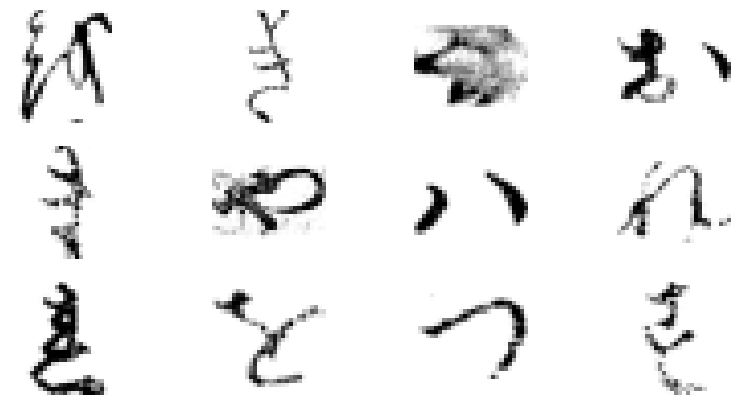

In [89]:
# Índices de las imágenes más cercanas a los centroides
idxs = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train.values[idxs]

# Mostrar las imágenes más representativas
plt.figure(figsize=(10, 5))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(3, 4, index+1)
    plt.imshow(X_representative_digit.reshape(28, 28), cmap="binary")
    plt.axis('off')
plt.show()


Explicación:

- Índices de Imágenes Representativas: np.argmin(X_digits_dist, axis=0) encuentra las imágenes más cercanas a cada centroide del cluster.

- Visualización: Muestra las imágenes más representativas de cada cluster en una cuadrícula.

#### Paso 5: Entrenamiento del Modelo de Clasificación
Ahora entrenamos un modelo de clasificación utilizando estas imágenes representativas y sus etiquetas:

In [91]:
from sklearn.linear_model import LogisticRegression

# Etiquetas de las imágenes representativas
y_representative_digits = y_train.values[idxs]

# Asegurarse de que X_representative_digits sea un arreglo de NumPy
X_representative_digits = X_train_scaled.iloc[idxs].values

# Entrenar el modelo de clasificación
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)

# Evaluar el modelo asegurándose de que X_test_scaled sea un arreglo de NumPy
X_test_scaled_np = X_test_scaled.values
score = log_reg.score(X_test_scaled_np, y_test)
precision_percentage = score * 100
print(f'Precisión del modelo de clasificación con imágenes representativas: {precision_percentage:.2f}%')

Precisión del modelo de clasificación con imágenes representativas: 51.51%


X_representative_digits = X_train_scaled.iloc[idxs].values convierte el DataFrame a un arreglo de NumPy.
X_test_scaled_np = X_test_scaled.values hace lo mismo para los datos de prueba.

### Paso 6: Entrenamiento del Modelo con Imágenes Aleatorias

- Imágenes Aleatorias: Entrena un modelo de regresión logística con 11 imágenes aleatorias del conjunto de entrenamiento y evalúa su precisión en el conjunto de prueba.

- Comparación: Esto permite comparar la eficacia de entrenar con imágenes representativas frente a imágenes aleatorias.

In [92]:
# Entrenamiento del modelo con 11 imágenes aleatorias
log_reg_random = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg_random.fit(X_train_scaled[:11], y_train[:11])
score_random = log_reg_random.score(X_test_scaled, y_test)
precision_random_percentage = score_random * 100
print(f'Precisión del modelo de clasificación con imágenes aleatorias: {precision_random_percentage:.2f}%')

CPU times: total: 0 ns
Wall time: 22.1 ms
Precisión del modelo de clasificación con imágenes aleatorias: 24.22%


#### Paso7: Asignación Automática de Etiquetas (Propagación de Etiquetas)



1. Concepto de Propagación de Etiquetas:

- Propagación: Asigna la etiqueta de la imagen representativa más cercana (el centroide del cluster) a todas las muestras que pertenecen al mismo cluster.
- Beneficio: Permite generar un conjunto de etiquetas extendido basado en un pequeño subconjunto de datos etiquetados, lo que es útil en contextos donde el etiquetado manual es costoso o laborioso.

- Iteración sobre los Clusters (k): Utiliza el valor optimal_k (obtenido del análisis de silueta) para iterar sobre los clusters y asignar etiquetas propagadas a todas las muestras en el conjunto de entrenamiento.

In [93]:
# Inicializa un array vacío del mismo tamaño que el conjunto de datos de entrenamiento (X_train).

# Propósito: Este array almacenará las etiquetas propagadas, es decir, 
# las etiquetas asignadas automáticamente a cada muestra de entrenamiento basada en los clusters formados por K-Means.
y_train_propagated = np.empty(len(X_train))


# Itera sobre cada cluster identificado por K-Means.
# kmeans.labels_ == i: Selecciona las muestras que pertenecen al cluster i
# Por ejemplo: Si i es 0, selecciona todas las muestras asignadas al primer cluster.

# y_representative_digits[i]: Obtiene la etiqueta de la imagen representativa del cluster i.
# Esta etiqueta fue asignada previamente a la imagen más representativa (el centroide) de cada cluster.
for i in range(k):
  y_train_propagated[kmeans.labels_== i] = y_representative_digits[i]

# y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]: 
# Asigna la etiqueta de la imagen representativa del cluster i a todas las muestras que pertenecen a ese cluster.

#Propósito: Asegurarse de que todas las muestras dentro de un mismo cluster tengan la misma etiqueta, basada en la etiqueta de la imagen más representativa de ese cluster.

Después de ejecutar el bucle, y_train_propagated contendrá las etiquetas propagadas para todas las muestras del conjunto de entrenamiento. Cada muestra tendrá la etiqueta de la imagen representativa del cluster al que pertenece.

#### Paso 8: Entrenamiento del Modelo con Etiquetas Propagadas

En este paso, utilizamos las etiquetas propagadas para entrenar un modelo de regresión logística.

In [94]:
# Proporción de datos a utilizar
proportion = 0.2  # 20%
num_samples = int(proportion * len(X_train))

# Entrenamiento de un modelo de regresión logística utilizando las etiquetas propagadas
log_reg_propagated = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=10000, random_state=42)

# 20% de 45k = 8000
# Utiliza las primeras 4000 muestras del conjunto de datos de entrenamiento (X_train_scaled[:4000]) y 
# sus etiquetas propagadas (y_train_propagated[:4000]).
log_reg_propagated.fit(X_train_scaled[:num_samples], y_train_propagated[:num_samples])

# Evaluamos el modelo en el conjunto de prueba (X_test_scaled y y_test) y muestra la precisión como un porcentaje.
score_propagated = log_reg_propagated.score(X_test_scaled, y_test)
precision_propagated_percentage = score_propagated * 100
print(f'Precisión del modelo de clasificación con etiquetas propagadas: {precision_propagated_percentage:.2f}%')


Precisión del modelo de clasificación con etiquetas propagadas: 65.71%


## 4. Aprendizaje Activo (Active Learning)

El aprendizaje activo es una técnica en la que el modelo de aprendizaje selecciona las muestras más informativas para ser etiquetadas manualmente. Este enfoque es útil cuando el etiquetado manual de datos es costoso y se desea maximizar la eficiencia del proceso de etiquetado.

In [95]:
from sklearn.linear_model import LogisticRegression
import numpy as np

def active_learning_iteration(X_train, y_train, y_train_propagated, X_test, y_test, k=10, iterations=10):
    log_reg_active = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)

    for iteration in range(iterations):
        # Entrenar el modelo con las etiquetas propagadas actuales
        log_reg_active.fit(X_train, y_train_propagated)
        
        # Obtener las probabilidades de predicción para el conjunto de entrenamiento
        probas = log_reg_active.predict_proba(X_train)

        # Calcular las incertidumbres como 1 - la probabilidad más alta
        uncertainties = 1 - np.max(probas, axis=1)
        
        # Seleccionar las muestras con las predicciones más inciertas
        uncertain_indices = np.argsort(uncertainties)[-k:]
        
        # Obtener las etiquetas verdaderas de las muestras seleccionadas
        true_labels = y_train.iloc[uncertain_indices].values
        
        # Actualizar las etiquetas propagadas con las etiquetas verdaderas de las muestras seleccionadas
        y_train_propagated[uncertain_indices] = true_labels

        # Evaluar el modelo en el conjunto de prueba
        score = log_reg_active.score(X_test, y_test)
        precision_percentage = score * 100
        print(f"Iteración {iteration+1}/{iterations} - Precisión con aprendizaje activo: {precision_percentage:.2f}%")

    return log_reg_active

# Ejecutar aprendizaje activo en a
final_model = active_learning_iteration(X_train_scaled, y_train, y_train_propagated, X_test_scaled, y_test, k=10, iterations=10)

Iteración 1/10 - Precisión con aprendizaje activo: 66.46%
Iteración 2/10 - Precisión con aprendizaje activo: 66.47%
Iteración 3/10 - Precisión con aprendizaje activo: 66.41%
Iteración 4/10 - Precisión con aprendizaje activo: 66.47%
Iteración 5/10 - Precisión con aprendizaje activo: 66.45%
Iteración 6/10 - Precisión con aprendizaje activo: 66.44%
Iteración 7/10 - Precisión con aprendizaje activo: 66.47%
Iteración 8/10 - Precisión con aprendizaje activo: 66.49%
Iteración 9/10 - Precisión con aprendizaje activo: 66.47%
Iteración 10/10 - Precisión con aprendizaje activo: 66.54%


Paso 1: Predicción de Probabilidades y Selección de Etiquetas con Baja Confianza

En este paso, el modelo predice las probabilidades de las etiquetas para cada muestra en el conjunto de entrenamiento. Luego, selecciona las muestras con las predicciones más inciertas, que se identifican por las menores probabilidades.

In [96]:
# Obtener las probabilidades de predicción para el conjunto de entrenamiento
probas = final_model.predict_proba(X_train_scaled)

# Calcular las incertidumbres como 1 - la probabilidad más alta
uncertainties = 1 - np.max(probas, axis=1)

# Seleccionar los índices de las muestras con las predicciones más inciertas
uncertain_indices = np.argsort(uncertainties)[-k:]

- probas = log_reg_active.predict_proba(X_train): Obtiene las probabilidades de predicción para cada muestra.
- uncertainties = 1 - np.max(probas, axis=1): Calcula las incertidumbres de las predicciones.
- uncertain_indices = np.argsort(uncertainties)[-k:]: Selecciona los índices de las muestras con las mayores incertidumbres.

#### Paso 2: Visualización de Imágenes con Baja Confianza

Visualiza las imágenes correspondientes a las predicciones más inciertas. Esto ayuda a identificar visualmente las muestras que el modelo considera más difíciles de clasificar.

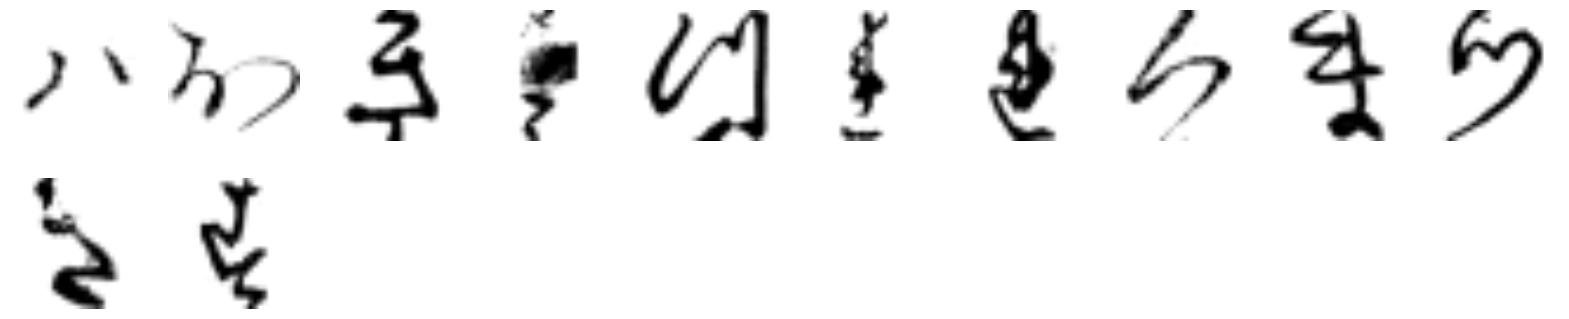

In [97]:
import matplotlib.pyplot as plt

# Seleccionar las muestras con las menores probabilidades (mayor incertidumbre)
X_lowest = X_train_scaled.values[uncertain_indices]

# Definir k correctamente (número de imágenes a mostrar)
k = len(X_lowest)

# Calcular el número de filas y columnas
ncols = 10
nrows = k // ncols + (1 if k % ncols != 0 else 0)

# Crear la figura
plt.figure(figsize=(ncols * 2, nrows * 2))

# Crear subplots para cada imagen en X_lowest
for index, img in enumerate(X_lowest):
    plt.subplot(nrows, ncols, index + 1)
    plt.imshow(img.reshape(28, 28), cmap="binary", interpolation="bilinear")
    plt.axis('off')

# Mostrar la figura
plt.show()

- X_lowest = X_train.values[uncertain_indices]: Selecciona las muestras con las menores probabilidades (mayor incertidumbre).
- plt.figure(figsize=(ncols * 2, nrows * 2)): Configura la visualización.
- plt.subplot(nrows, ncols, index + 1): Crea subplots para cada imagen en X_lowest.
- plt.imshow(img.reshape(28, 28), cmap="binary", interpolation="bilinear"): Muestra la imagen con baja confianza.

#### Paso 3: Obtener las Etiquetas Verdaderas y Actualizar las Etiquetas Propagadas

Actualiza las etiquetas propagadas con las etiquetas verdaderas de las muestras seleccionadas. Esto mejora la precisión del modelo en las siguientes iteraciones.

In [98]:
# Obtener las etiquetas verdaderas de las muestras seleccionadas
true_labels = y_train.iloc[uncertain_indices].values

# Actualizar las etiquetas propagadas con las etiquetas verdaderas de las muestras seleccionadas
y_train_propagated[uncertain_indices] = true_labels

In [99]:
true_labels

array([5, 0, 1, 1, 3, 8, 8, 3, 6, 3, 1, 2], dtype=int64)

#### Paso 4: Evaluación del Modelo y Reentrenamiento

Evalúa el modelo en el conjunto de prueba y muestra la precisión. Luego, el modelo se reentrena con las etiquetas actualizadas para la siguiente iteración.

In [102]:
log_reg_active = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg_active.fit(X_train_scaled, y_train_propagated)

# Evaluar el modelo en el conjunto de prueba
score = log_reg_active.score(X_test_scaled, y_test)
precision_percentage = score * 100
print(f"Precisión del modelo reentrenado con aprendizaje activo: {precision_percentage:.2f}%")


Precisión del modelo reentrenado con aprendizaje activo: 66.47%
